In [30]:
import pandas as pd
import numpy as np

In [31]:
# import data set
df = pd.read_csv('Advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [32]:
# We will be using predictive columns from the dataset to predict whether or not the user
# has pressed on the ad
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [33]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [34]:
# define the predictive and explanatory variables
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [35]:
# apply train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
# apply logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

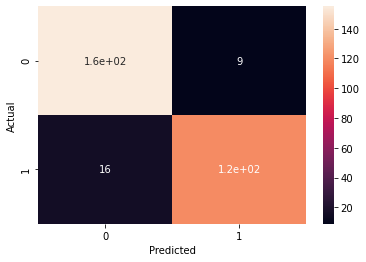

In [37]:
# confusion matrix to check accuracy of model
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [38]:
# as we can see from the heatmap/confusion matrix
# 162 true positives
# 122 true negatives 
# 16 false negatives
# 9 false positives

In [39]:
# another confusion matrix
from sklearn import metrics
con_matrix = metrics.confusion_matrix(y_test, y_pred)
con_matrix

array([[155,   9],
       [ 16, 120]], dtype=int64)

In [42]:
# print out accuracy scores
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is:", accuracy)
precision = metrics.precision_score(y_test, y_pred)
print("The precision score is:", precision)

The accuracy score is: 0.9166666666666666
The precision score is: 0.9302325581395349


In [47]:
# making our own predictions!
new_input = [[100.2, 17, 160000, 340, 0], [20.4, 34, 65000, 120, 1]]
new_prediction = logreg.predict(new_input)
print(new_prediction)

[0 1]
